In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/tra301_final_project

/content/drive/MyDrive/tra301_final_project


In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
results_dir = 'results'
data_fluent = {}
data_literal = {}
english_data = {}

for filename in os.listdir(results_dir):
    if filename.endswith('_cleaned_fluent_translation_results.json'):
        lang = filename.split('_')[0]
        with open(os.path.join(results_dir, filename), 'r') as f:
            data_fluent[lang] = json.load(f)
    elif filename.endswith('_cleaned_literal_translation_results.json'):
        lang = filename.split('_')[0]
        with open(os.path.join(results_dir, filename), 'r') as f:
            data_literal[lang] = json.load(f)
    elif filename == 'english_results.json':
        with open(os.path.join(results_dir, filename), 'r') as f:
            english_data = json.load(f)

In [ ]:
accuracies_fluent = {}
accuracies_literal = {}

for lang, metrics in data_fluent.items():
    accuracies_fluent[lang] = metrics['eval_accuracy']

for lang, metrics in data_literal.items():
    accuracies_literal[lang] = metrics['eval_accuracy']

accuracies_fluent['english'] = english_data['accuracy']
accuracies_literal['english'] = english_data['accuracy']

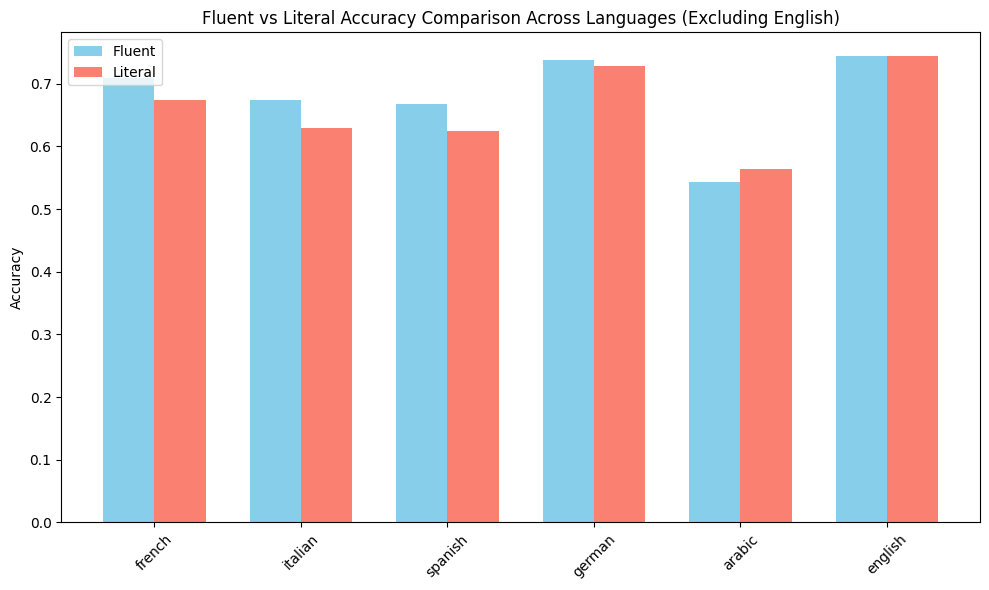

In [ ]:
plt.figure(figsize=(10,6))
x = np.arange(len(accuracies_fluent))
width = 0.35

plt.bar(x - width/2, accuracies_fluent.values(), width, label='Fluent', color='skyblue')
plt.bar(x + width/2, accuracies_literal.values(), width, label='Literal', color='salmon')

plt.ylabel('Accuracy')
plt.title('Fluent vs Literal Accuracy Comparison Across Languages (Including English)')
plt.xticks(x, accuracies_fluent.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
classes = ['Negative', 'Neutral', 'Positive']
f1_scores_fluent = {cls: {} for cls in classes}
f1_scores_literal = {cls: {} for cls in classes}

for lang, metrics in data_fluent.items():
    for cls in classes:
        f1_scores_fluent[cls][lang] = metrics['detailed_metrics'][cls]['f1-score']

for lang, metrics in data_literal.items():
    for cls in classes:
        f1_scores_literal[cls][lang] = metrics['detailed_metrics'][cls]['f1-score']

for cls in classes:
    f1_scores_fluent[cls]['english'] = english_data['classification_report'][cls]['f1-score']
    f1_scores_literal[cls]['english'] = english_data['classification_report'][cls]['f1-score']

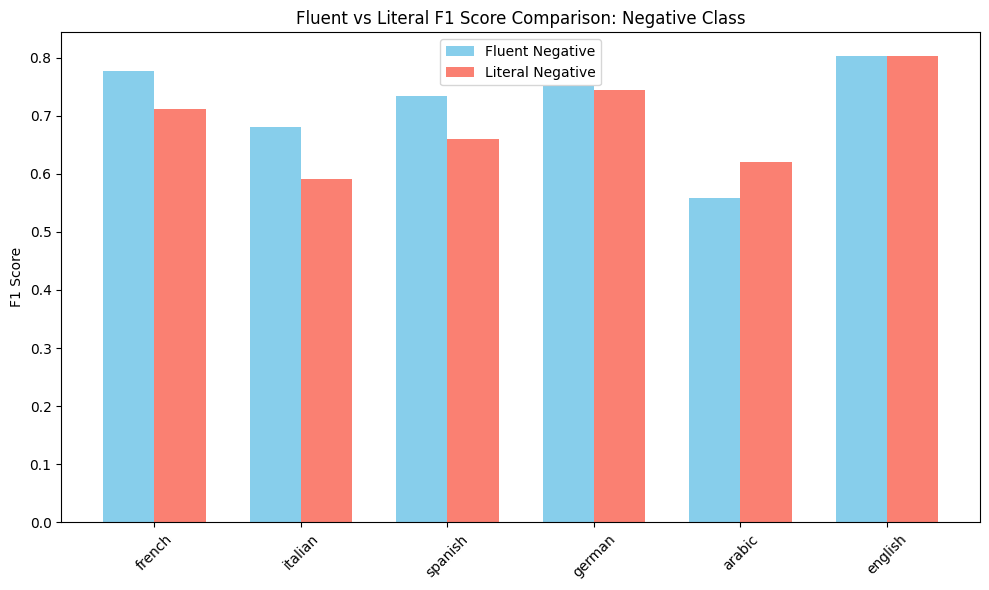

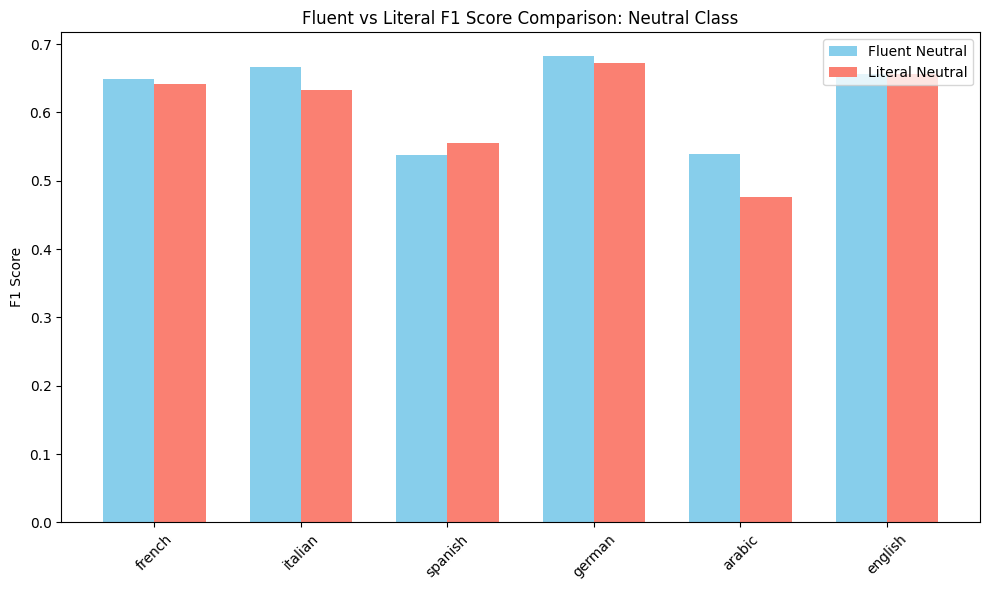

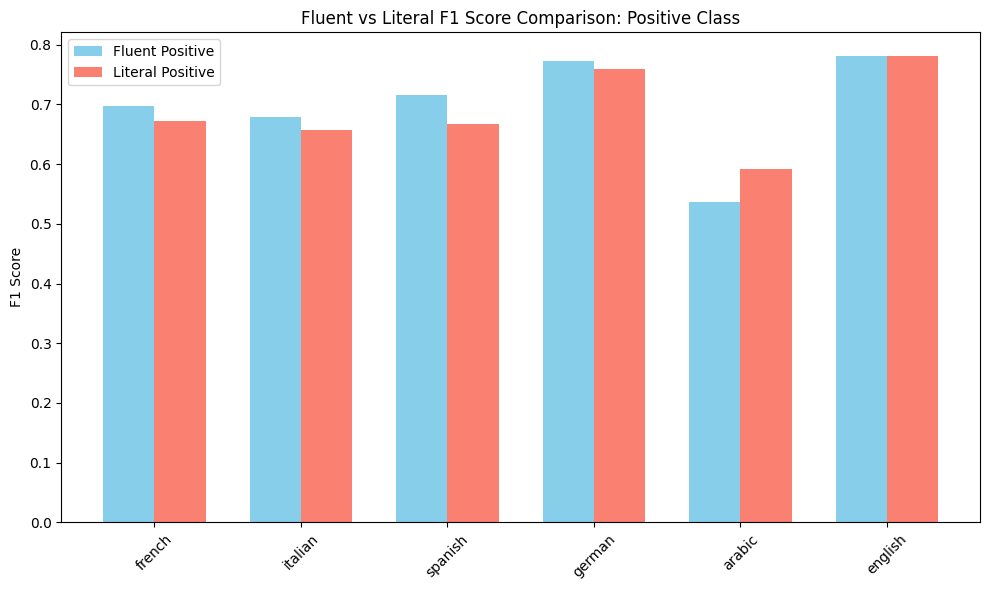

In [ ]:
for cls in classes:
    plt.figure(figsize=(10,6))
    x = np.arange(len(f1_scores_fluent[cls]))
    width = 0.35

    plt.bar(x - width/2, f1_scores_fluent[cls].values(), width, label=f'Fluent {cls}', color='skyblue')
    plt.bar(x + width/2, f1_scores_literal[cls].values(), width, label=f'Literal {cls}', color='salmon')

    plt.ylabel('F1 Score')
    plt.title(f'Fluent vs Literal F1 Score Comparison: {cls} Class')
    plt.xticks(x, f1_scores_fluent[cls].keys(), rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

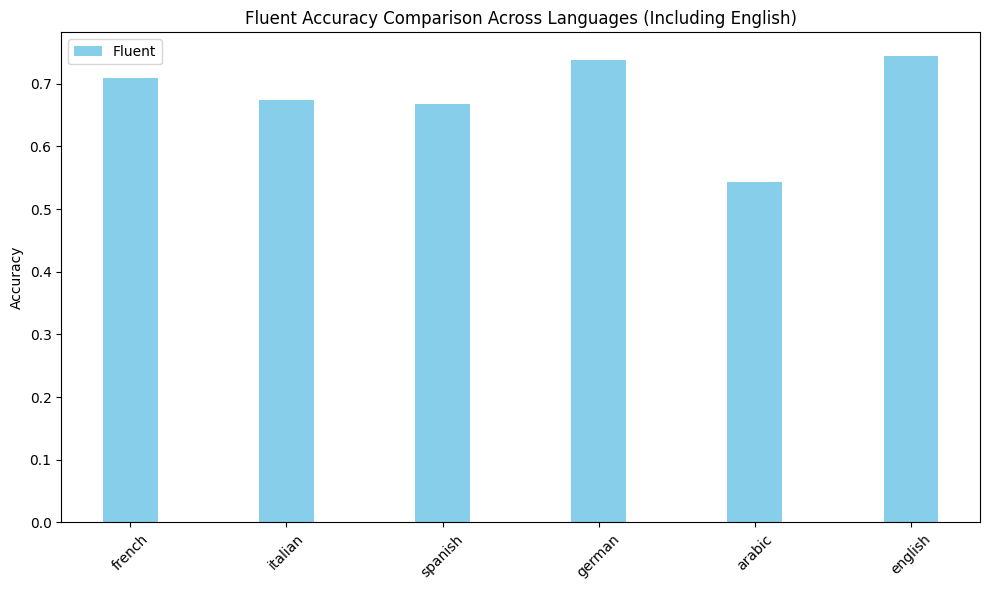

In [ ]:
plt.figure(figsize=(10,6))
x = np.arange(len(accuracies_fluent))
width = 0.35

plt.bar(x, accuracies_fluent.values(), width, label='Fluent', color='skyblue')

plt.ylabel('Accuracy')
plt.title('Fluent Accuracy Comparison Across Languages (Including English)')
plt.xticks(x, accuracies_fluent.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

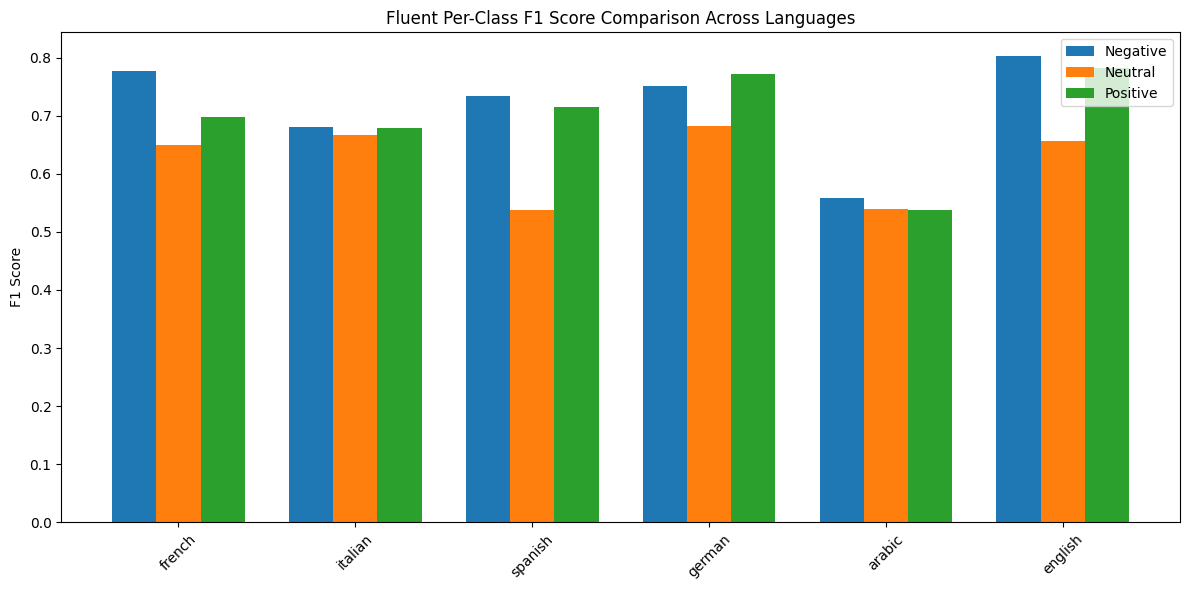

In [ ]:
x = np.arange(len(f1_scores_fluent['Negative']))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))

for i, cls in enumerate(classes):
    ax.bar(x + i * width, f1_scores_fluent[cls].values(), width, label=cls)

ax.set_ylabel('F1 Score')
ax.set_title('Fluent Per-Class F1 Score Comparison Across Languages')
ax.set_xticks(x + width)
ax.set_xticklabels(f1_scores_fluent['Negative'].keys(), rotation=45)
ax.legend()
plt.tight_layout()
plt.show()